In [1]:
import numpy, pandas, datetime
import cobra, cobra.test

In [2]:
import multiprocessing, multiprocessing.pool
from multiprocessing import Process, Queue

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':30, 'ytick.labelsize':30, 'axes.labelsize':40, 'figure.figsize':(12, 8)})

In [4]:
def growth_coupled_analysis(task):
    
    """
    This function performs the growth-coupled production.
    It takes as input a list as [first_gene_pair_index, second_gene_pair_index, metabolite_of_interest, biomass_reaction_label]
    It gives as output a list as [first_gene_pair_index, second_gene_pair_index, growth, min_production, max_production]
    """
    
    i = task[0]
    j = task[1]
    metabolite_of_interest = task[2]
    biomass_reaction_label = task[3]
    model = task[4]
    
    with model as model:
                
        # KO
        model.genes[i].knock_out()
        model.genes[j].knock_out()
        solution = model.optimize()
        if solution.status == 'optimal':
            ko_growth = solution.objective_value

            # growth-coupled production
            model.objective = metabolite_of_interest
            model.reactions.get_by_id(biomass_reaction_label).lower_bound = ko_growth
            max_production = model.optimize(objective_sense='maximize').objective_value
            min_production = model.optimize(objective_sense='minimize').objective_value

            #print(i,j)
            #print(model.genes[i], model.genes[j])
            #print('ko_growth', ko_growth)
            #print('productions', min_production, max_production)
            #print()
            result = [i, j, ko_growth, min_production, max_production]
        else:
            #print('unfeasible')
            #print()
            result = [i, j, 0, 0, 0]

    return result

In [5]:
def printt(message):

    print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S \t {}".format(message)))

    return None

# 1. load and explore the model

In [6]:
model = cobra.test.create_test_model("textbook")
model.summary()

Restricted license - for non-production use only - expires 2023-10-25


Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


In [7]:
wt_solution = model.optimize()
print(wt_solution.objective_value)

0.8739215069684305


In [8]:
len(model.genes)

137

# 2. growth-coupled metabolite production exploration

## 2.1. define metabolite of interest and biomass function label

In [9]:
metabolite_of_interest = 'EX_ac_e'
biomass_reaction_label = 'Biomass_Ecoli_core'

## 2.2. run serial

In [10]:
%%time
number_of_genes = len(model.genes)
results = []
for i in range(len(model.genes)):
    for j in range(len(model.genes)):
        if i < j:
            
            task = [i, j, metabolite_of_interest, biomass_reaction_label, model]
            result = growth_coupled_analysis(task)
            results.append(result)         

/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"

/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"

/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"

/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"

/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"

/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"

CPU times: user 1min 18s, sys: 172 ms, total: 1min 18s
Wall time: 1min 18s


In [11]:
df = pandas.DataFrame(results, columns=['i', 'j', 'KO growth', 'min production', 'max production'])

In [12]:
df.head()

,i,j,KO growth,min production,max production
0,0,1,0.873922,0.000000,0.000000
1,0,2,0.211141,8.318655,8.318655
2,0,3,0.873922,0.000000,0.000000
3,0,4,0.873922,0.000000,0.000000
4,0,5,0.873922,0.000000,0.000000


In [13]:
df.sort_values(by=['min production'], ascending=False)

,i,j,KO growth,min production,max production
2750,21,126,0.374230,14.312267,14.312267
2635,20,126,0.374230,14.312267,14.312267
2864,22,126,0.374230,14.312267,14.312267
2519,19,126,0.374230,14.312267,14.312267
2284,17,126,0.374230,14.312267,14.312267
...,...,...,...,...,...
3317,26,133,0.873922,0.000000,0.000000
3316,26,132,0.873922,0.000000,0.000000
3315,26,131,0.858307,0.000000,0.000000
3314,26,130,0.858307,0.000000,0.000000


### 2.2.1. plot production envelope

In [14]:
# WT
plotting_wt_biomass = []
wt_production = []

biomass_space = numpy.linspace(0, wt_solution.objective_value, 100)

with model as model:
    model.objective = metabolite_of_interest
    for target in biomass_space:
        model.reactions.get_by_id(biomass_reaction_label).bounds = (target, target)
        solution = model.optimize()
        if solution.status == 'optimal':
            plotting_wt_biomass.append(target); wt_production.append(solution.objective_value)

In [15]:
# KO
i=21; j=126

plotting_ko_biomass = []
max_productions = []
min_productions = []

with model as model:
    model.genes[i].knock_out() 
    model.genes[j].knock_out()
    ko_solution = model.optimize()
    
    biomass_space = numpy.linspace(0, ko_solution.objective_value, 100)
    with model as model:
        model.objective = metabolite_of_interest
        for target in biomass_space:
            model.reactions.get_by_id(biomass_reaction_label).lower_bound = target
            max_production = model.optimize(objective_sense='maximize').objective_value
            min_production = model.optimize(objective_sense='minimize').objective_value
            plotting_ko_biomass.append(target); max_productions.append(max_production); min_productions.append(min_production)

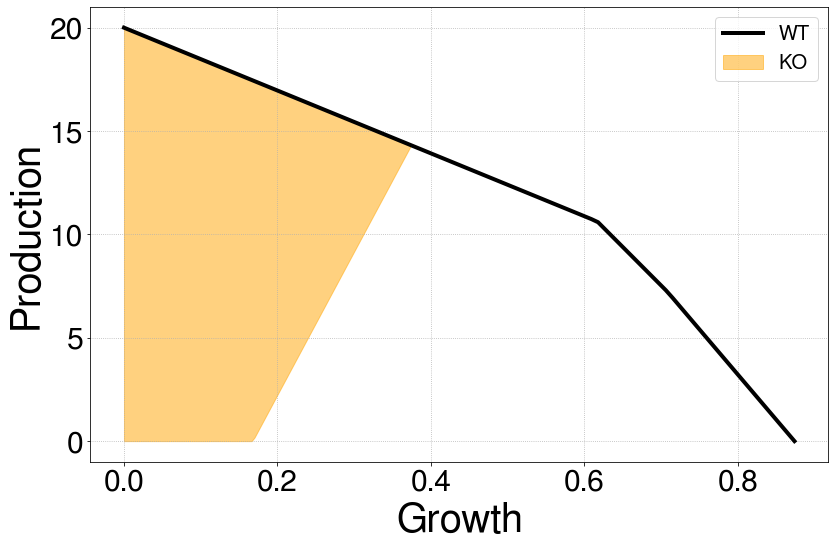

In [16]:
# make figure
matplotlib.pyplot.plot(plotting_wt_biomass, wt_production, '-', color='black', lw=4, label='WT')
matplotlib.pyplot.fill_between(plotting_ko_biomass, min_productions, max_productions, color='orange', alpha=0.5, label='KO')

matplotlib.pyplot.xlabel('Growth')
matplotlib.pyplot.ylabel('Production')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.legend()

matplotlib.pyplot.tight_layout()

## 2.3. run in parallel environment

Using multiprocessing could be difficult because if the function yields an error, it is difficult to track. Consider using testing functions and serial code as in previous section to avoid errors while executing the parallel approach.

In [17]:
number_of_threads = 20

In [18]:
printt('working with {} genes'.format(number_of_genes))

tasks = []
for i in range(len(model.genes)):
    for j in range(len(model.genes)):
        if i < j:
            task = [i, j, metabolite_of_interest, biomass_reaction_label, model]
            tasks.append(task)
printt('working with {} gene pairs'.format(len(tasks)))

2022-03-29 18:38:19 	 working with 137 genes
2022-03-29 18:38:19 	 working with 9316 gene pairs


In [19]:
%%time
printt('entering a parallel world of {} threads'.format(number_of_threads))
hydra = multiprocessing.pool.Pool(number_of_threads)
hydra_output = hydra.map(growth_coupled_analysis, tasks)
hydra.close()
printt('completed {} tasks'.format(len(hydra_output)))

2022-03-29 18:38:19 	 entering a parallel world of 20 threads
Read LP format model from file /tmp/tmpzqxzjb4_.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Reading time = 0.00 seconds
Read LP format model from file /tmp/tmp1ql4r1my.lp
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmp_aikxbif.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpc7xpg5mw.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmp3bl32lhm.lp
Reading time = 0.00 seconds
Read LP format model from file /tmp/tmp0pz4xnlw.lp
: 72 rows, 190 columns, 720 nonzeros
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpmab5g_06.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpliav7qvc.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP fo

/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"

/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file /tmp/tmprsjuc78_.lp


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmp257v4isx.lp


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file /tmp/tmpu72t71vy.lp
Reading time = 0.00 seconds
Reading time = 0.03 seconds
: 72 rows, 190 columns, 720 nonzeros


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file /tmp/tmpk56fr1xu.lp
: 72 rows, 190 columns, 720 nonzeros
Reading time = 0.02 seconds
Read LP format model from file /tmp/tmp48uozfnn.lp
: 72 rows, 190 columns, 720 nonzeros
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpezwforwr.lp


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Reading time = 0.02 seconds
Read LP format model from file /tmp/tmpld98ozpg.lp
Read LP format model from file /tmp/tmpcyaf4gqp.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpy881orjr.lp
: 72 rows, 190 columns, 720 nonzeros
Reading time = 0.01 seconds
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpgtz69_t3.lp
Reading time = 0.01 seconds
Read LP format model from file /tmp/tmpraaoyncl.lp
Read LP format model from file /tmp/tmprpsfwam7.lp
: 72 rows, 190 columns, 720 nonzeros
Reading time = 0.01 seconds
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmppvrsdt4t.lp
Read LP format model from file /tmp/tmpxmdeyp_p.lp
Reading time = 0.01 seconds
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpzfd_4

/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"

/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"

Read LP format model from file /tmp/tmpitomewlv.lp


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpo9cj_yi6.lp
Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file /tmp/tmposv__kve.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpqppf8jwo.lp
Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmp4lz6sjga.lp
Reading time = 0.03 seconds


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpyn23qo66.lp
Read LP format model from file /tmp/tmp9znym_w2.lp
Read LP format model from file /tmp/tmphnkynp66.lp
Reading time = 0.01 seconds
Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros
Reading time = 0.03 seconds
: 72 rows, 190 columns, 720 nonzeros
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpyp0uxzzl.lp
Read LP format model from file /tmp/tmpb36tb6jw.lp
Reading time = 0.04 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpz6riy91b.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Reading time = 0.00 seconds
Read LP format model from file /tmp/tmplf9uo923.lp
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmp7zt7xwao.lp
Read LP format model from file /tmp/tmpatlf0roh.lp


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Reading time = 0.01 seconds
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Reading time = 0.01 seconds
Read LP format model from file /tmp/tmpgbtuxcss.lp
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpuzbz5d5z.lp
: 72 rows, 190 columns, 720 nonzeros
Reading time = 0.00 seconds


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmp4icxdm08.lp


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file /tmp/tmpok00peff.lp


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file /tmp/tmpf7zbs0yd.lp
Reading time = 0.00 seconds


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


: 72 rows, 190 columns, 720 nonzeros


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file /tmp/tmp03lzga_0.lp


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Reading time = 0.02 seconds


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


: 72 rows, 190 columns, 720 nonzeros


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"

/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"

/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"

/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"

Read LP format model from file /tmp/tmp85juirvu.lp


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Reading time = 0.02 seconds


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


: 72 rows, 190 columns, 720 nonzeros


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file /tmp/tmpto_gsk3u.lp


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Reading time = 0.02 seconds


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


: 72 rows, 190 columns, 720 nonzeros


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file /tmp/tmpr62ovzb2.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmppd3u_fhr.lp
Reading time = 0.02 seconds


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file /tmp/tmp4jli2mud.lp
: 72 rows, 190 columns, 720 nonzeros


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpljahuhwu.lp
Reading time = 0.00 seconds
Read LP format model from file /tmp/tmpzjz_615f.lp
Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpmvg3u5ad.lp
Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmprmrj4d8s.lp
Reading time = 0.03 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpexzrubem.lp


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Reading time = 0.03 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmplc19zb_i.lp
Reading time = 0.00 seconds
Read LP format model from file /tmp/tmpr1b2qyna.lp
Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmppcwkd10k.lp
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpmcoznbhh.lp
Reading time = 0.02 seconds
Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpy9bt9rq2.lp
Reading time = 0.03 seconds
Read LP format model from file /tmp/tmp20epicj_.lp
: 72 rows, 190 columns, 720 nonzeros
Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmp9qx1v5od.lp
Reading time = 0.02 seconds
Read LP format model from file /tmp/tmpqooqpieh.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
: 72 rows, 190 columns, 720 nonzeros
Read LP

/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Reading time = 0.02 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmp8jfu_b3i.lp
Reading time = 0.02 seconds


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


: 72 rows, 190 columns, 720 nonzeros


/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/adrian/anaconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"

2022-03-29 18:38:31 	 completed 9316 tasks
CPU times: user 820 ms, sys: 177 ms, total: 997 ms
Wall time: 12.8 s


In [20]:
df = pandas.DataFrame(hydra_output, columns=['i', 'j', 'KO growth', 'min production', 'max production'])
df.sort_values(by=['min production'], ascending=False)

,i,j,KO growth,min production,max production
2635,20,126,0.374230,14.312267,14.312267
2168,16,129,0.374230,14.312267,14.312267
2867,22,129,0.374230,14.312267,14.312267
2866,22,128,0.374230,14.312267,14.312267
2865,22,127,0.374230,14.312267,14.312267
...,...,...,...,...,...
3317,26,133,0.873922,0.000000,0.000000
3316,26,132,0.873922,0.000000,0.000000
3315,26,131,0.858307,0.000000,0.000000
3314,26,130,0.858307,0.000000,0.000000
